1. Write a program to perform 4 arithmetic operations between 2 images.  
2. Take a noisy image. Write a program which reduces the noise by averaging the input image by 2, 8, 16, 32, 128. Compare all the resultant images and find which one is noise-free.  
3. Write a program which implements all the types of linear spatial filters using functions.  
4. Implement a program for image convolution and correlation using a rectangular convolution mask of any odd size. The mask should be input as an ASCII text file. Test your program using the following convolutional kernels:  
   a. 3×3 averaging  
   b. 7×7 averaging  
   c. 11×11 averaging  


In [2]:
%pip install opencv-python numpy

In [3]:
import cv2
import numpy as np

--2025-08-01 10:27:36--  https://i.ytimg.com/vi/vEYsdh6uiS4/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.251.107.119, 74.125.196.119, 173.194.216.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.251.107.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32228 (31K) [image/jpeg]
Saving to: ‘image1.png’

image1.png          100%[===================>]  31.47K  --.-KB/s    in 0s      

2025-08-01 10:27:36 (67.5 MB/s) - ‘image1.png’ saved [32228/32228]



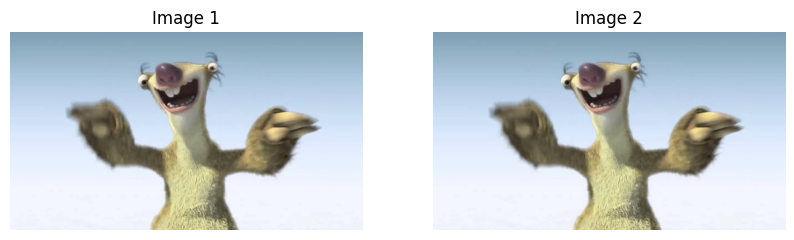

In [4]:
!wget -O image1.png https://i.ytimg.com/vi/vEYsdh6uiS4/maxresdefault.jpg
import shutil
shutil.copy('image1.png', 'image2.png')
img1 = cv2.imread('image1.png')
img2 = cv2.imread('image2.png')

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')
plt.show()

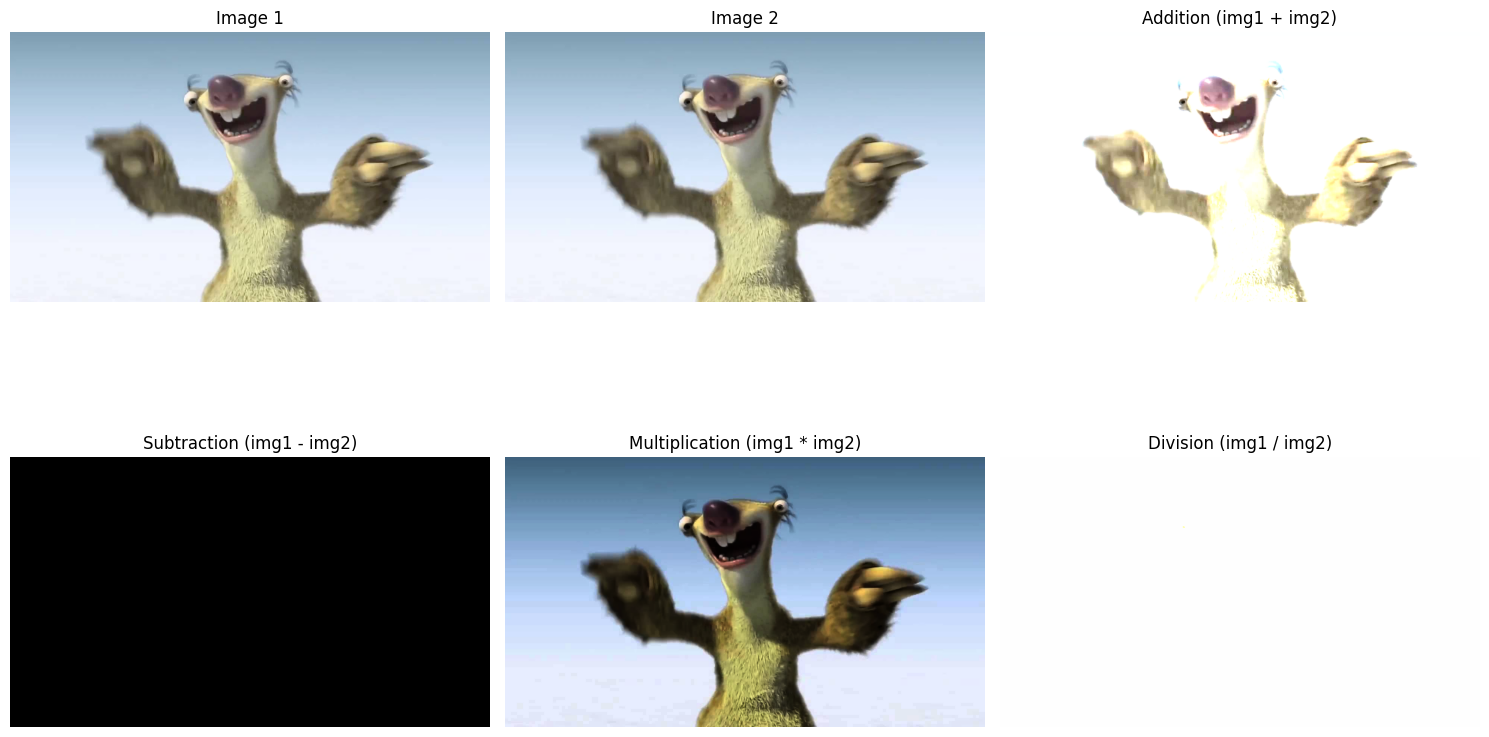

In [5]:
# 1. addition
img_add = cv2.add(img1, img2)

# 2. subtraction
img_sub = cv2.subtract(img1, img2)

# 3. multiplication
img1_float = img1.astype(np.float32) / 255.0
img2_float = img2.astype(np.float32) / 255.0
img_mul_float = cv2.multiply(img1_float, img2_float)
img_mul = (img_mul_float * 255.0).astype(np.uint8)

# 4. division
img_div_float = cv2.divide(img1_float, img2_float + 1e-5)
img_div = (img_div_float * 255.0).astype(np.uint8)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB))
plt.title('Addition (img1 + img2)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(img_sub, cv2.COLOR_BGR2RGB))
plt.title('Subtraction (img1 - img2)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img_mul, cv2.COLOR_BGR2RGB))
plt.title('Multiplication (img1 * img2)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(img_div, cv2.COLOR_BGR2RGB))
plt.title('Division (img1 / img2)')
plt.axis('off')

plt.tight_layout()
plt.show()

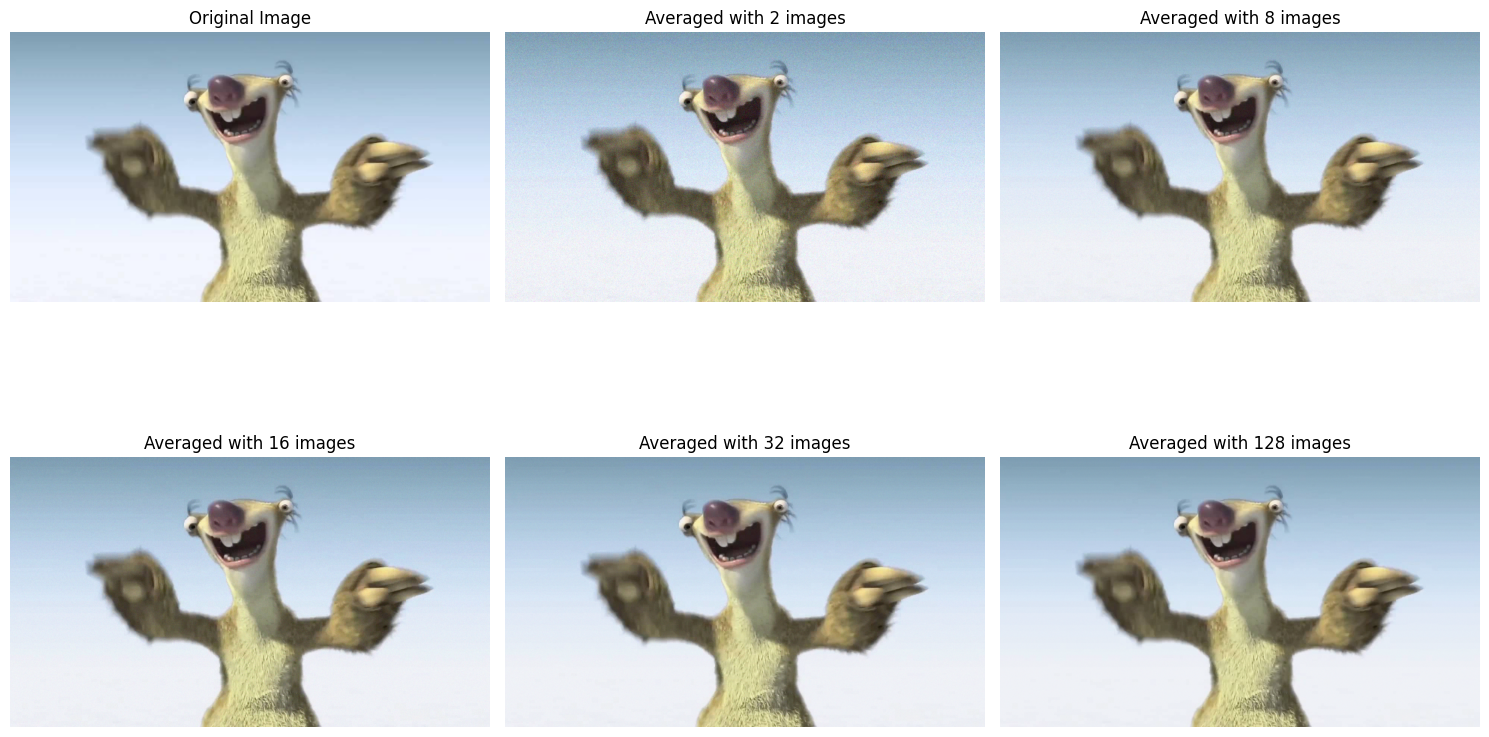

In [6]:
def reduce_noise_by_averaging(image, num_averages):

    if num_averages <= 0:
        return image

    averaged_image = np.zeros_like(image, dtype=np.float64)

    for _ in range(num_averages):
        noise = np.random.normal(0, 20, image.shape).astype(np.int16)
        noisy_image = cv2.add(image.astype(np.int16), noise, dtype=cv2.CV_16S)
        noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

        averaged_image += noisy_image.astype(np.float64)

    averaged_image /= num_averages

    return np.clip(averaged_image, 0, 255).astype(np.uint8)

num_averages_list = [2, 8, 16, 32, 128]
averaged_images = {}

for num_avg in num_averages_list:
    averaged_images[num_avg] = reduce_noise_by_averaging(img1, num_avg)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

for i, num_avg in enumerate(num_averages_list):
    plt.subplot(2, 3, i + 2)
    plt.imshow(cv2.cvtColor(averaged_images[num_avg], cv2.COLOR_BGR2RGB))
    plt.title(f'Averaged with {num_avg} images')
    plt.axis('off')

plt.tight_layout()
plt.show()

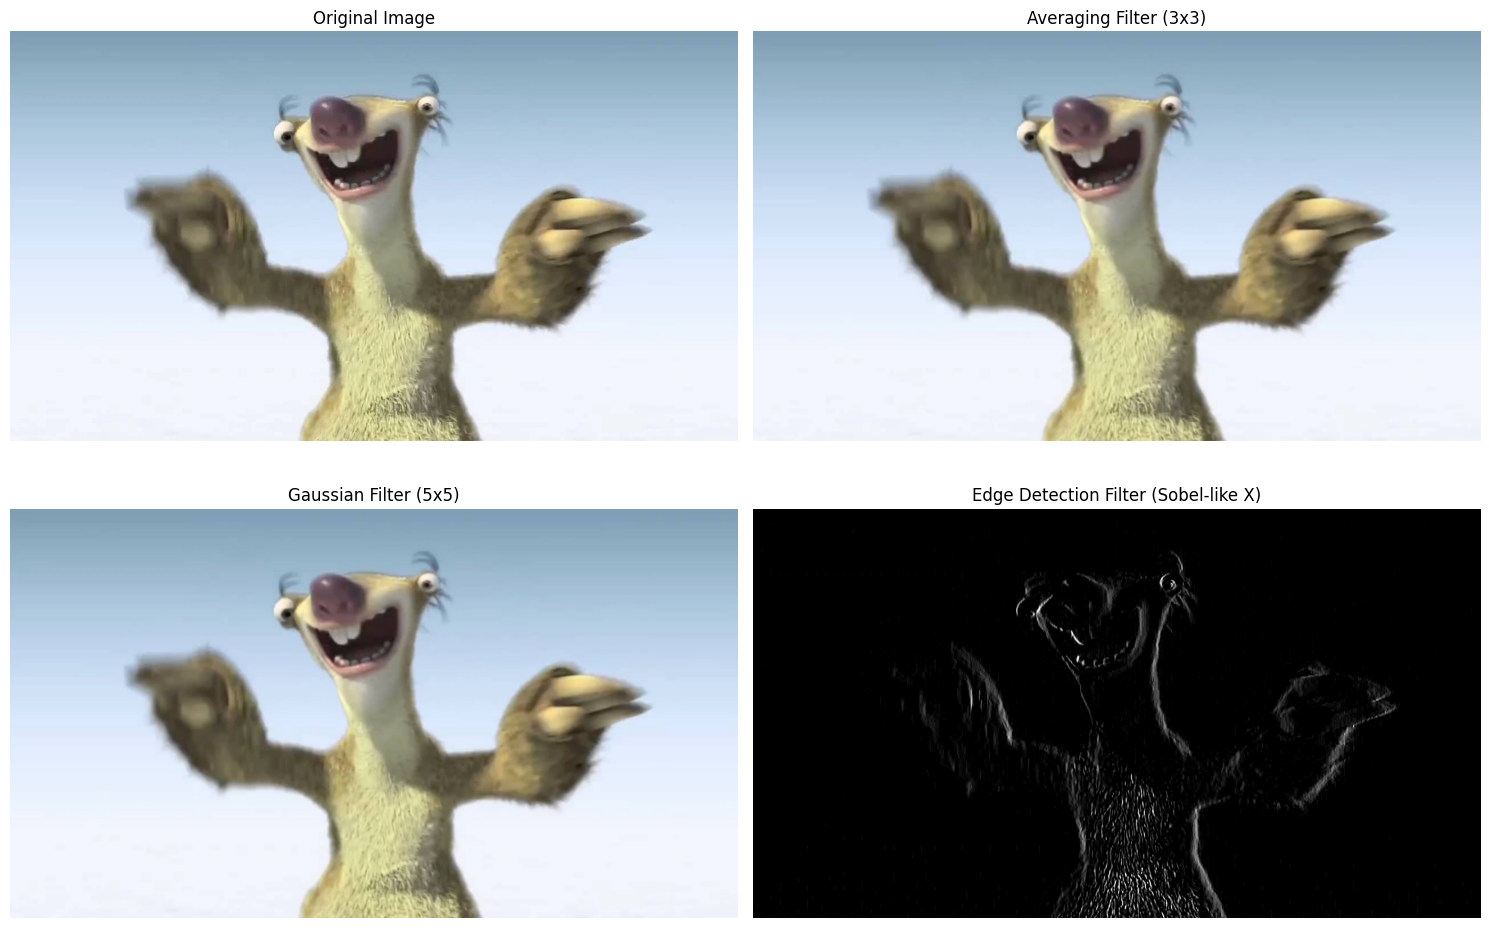

In [7]:
def apply_convolution(image, kernel):

    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel dimensions must be odd")

    img_height, img_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REPLICATE)

    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(img_height):
        for j in range(img_width):
            # extract the region of interest (ROI) from the padded image
            roi = padded_image[i:i + kernel_height, j:j + kernel_width]

            if len(image.shape) == 3:
                for c in range(image.shape[2]):
                    output_image[i, j, c] = np.sum(roi[:, :, c] * kernel)
            else:
                 output_image[i, j] = np.sum(roi * kernel)

    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image


# 1. averaging filter (3x3)
average_kernel_3x3 = np.ones((3, 3), np.float32) / 9

# 2. gaussian filter (5x5 - approximation)
gaussian_kernel_5x5 = np.array([[1, 4, 7, 4, 1],
                                [4, 16, 26, 16, 4],
                                [7, 26, 41, 26, 7],
                                [4, 16, 26, 16, 4],
                                [1, 4, 7, 4, 1]], dtype=np.float32) / 273

# 3. edge detection filter (Sobel-like in x direction)
edge_detection_kernel_x = np.array([[-1, 0, 1],
                                   [-2, 0, 2],
                                   [-1, 0, 1]], dtype=np.float32)

img_averaged = apply_convolution(img1, average_kernel_3x3)
img_gaussian = apply_convolution(img1, gaussian_kernel_5x5)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_edge_x = apply_convolution(img1_gray, edge_detection_kernel_x)


plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_averaged, cv2.COLOR_BGR2RGB))
plt.title('Averaging Filter (3x3)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filter (5x5)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_edge_x, cmap='gray')
plt.title('Edge Detection Filter (Sobel-like X)')
plt.axis('off')

plt.tight_layout()
plt.show()

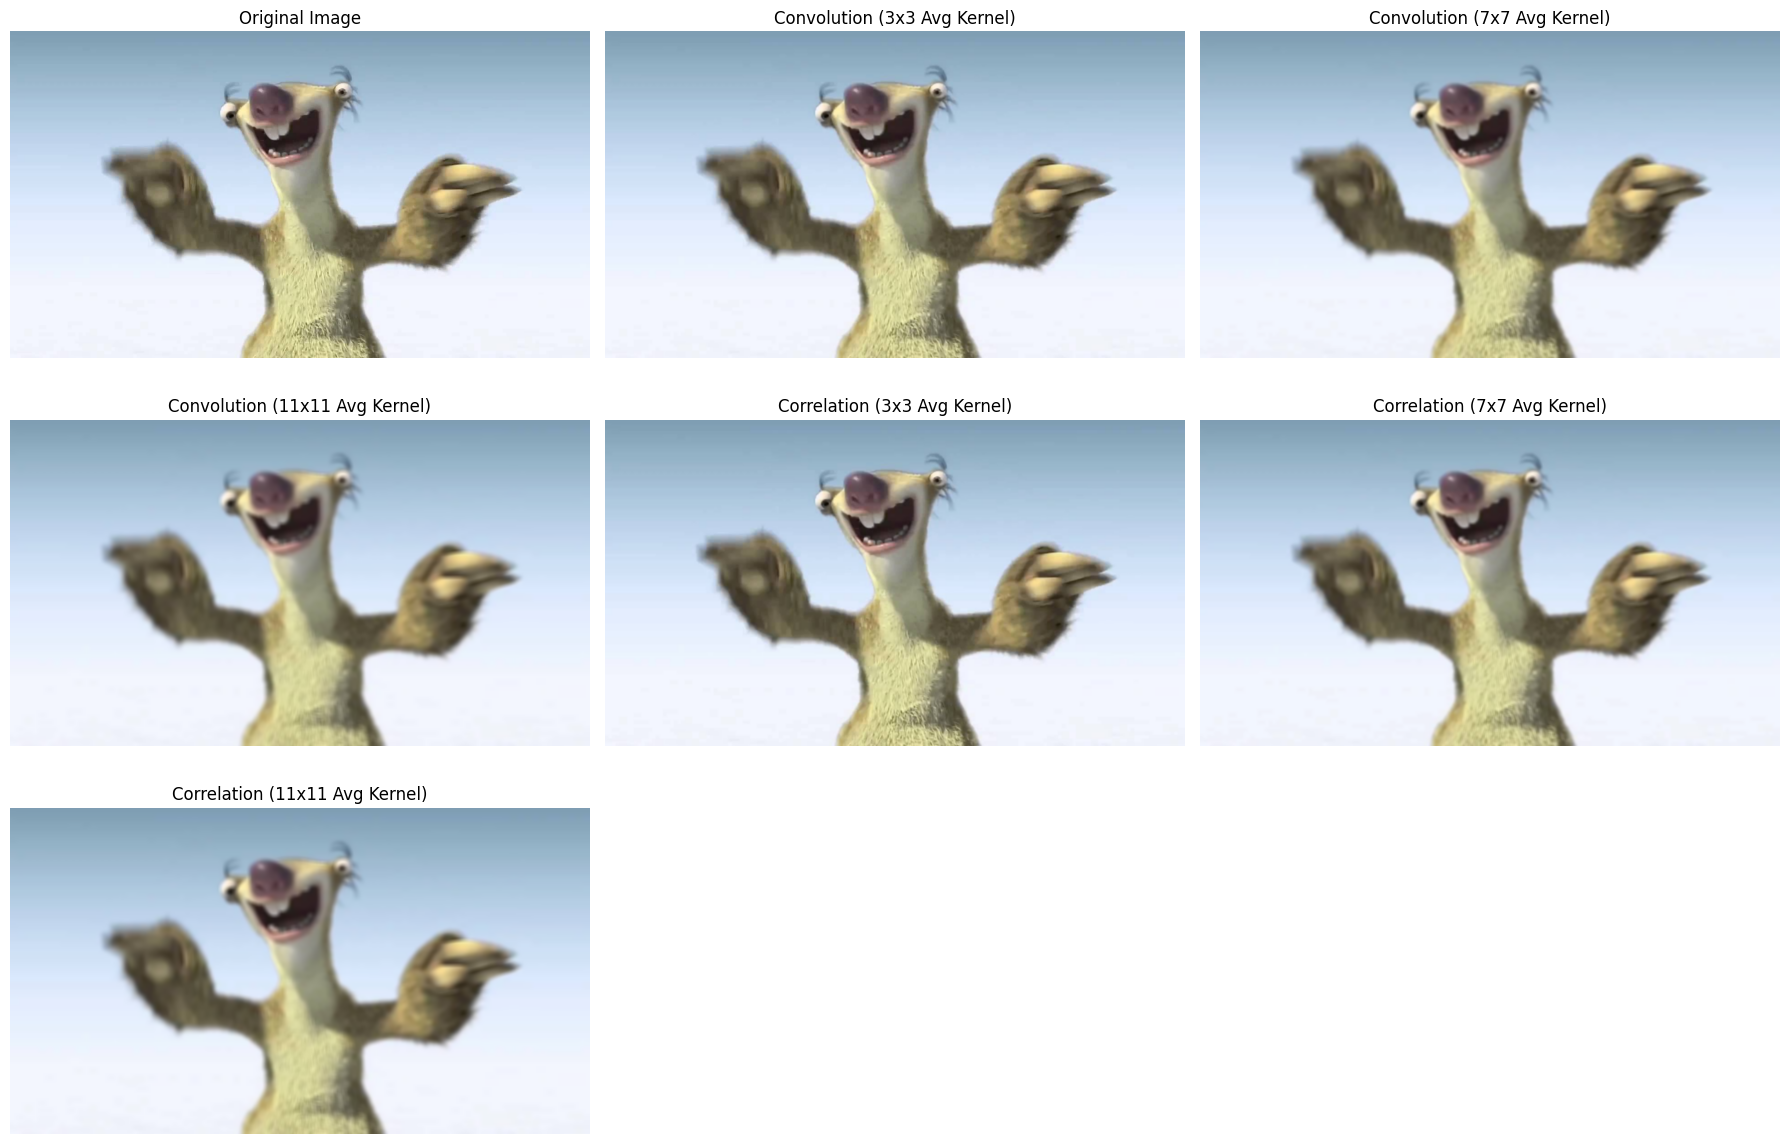

In [8]:
def load_kernel_from_text(file_path):

    with open(file_path, 'r') as f:
        lines = f.readlines()
    kernel_list = []
    for line in lines:
        row = [float(x) for x in line.replace(',', ' ').split()]
        kernel_list.append(row)
    return np.array(kernel_list, dtype=np.float32)

def apply_correlation(image, kernel):

    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel dimensions must be odd")

    img_height, img_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REPLICATE)

    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(img_height):
        for j in range(img_width):
            roi = padded_image[i:i + kernel_height, j:j + kernel_width]

            if len(image.shape) == 3:
                for c in range(image.shape[2]):
                    output_image[i, j, c] = np.sum(roi[:, :, c] * kernel)
            else:
                 output_image[i, j] = np.sum(roi * kernel)

    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image

# 3x3 averaging kernel
with open('average_kernel_3x3.txt', 'w') as f:
    val = 1/9.0
    f.write(f'{val} {val} {val}\n')
    f.write(f'{val} {val} {val}\n')
    f.write(f'{val} {val} {val}\n')

# 7x7 averaging kernel
with open('average_kernel_7x7.txt', 'w') as f:
    val = 1/49.0
    for _ in range(7):
        f.write((' '.join([str(val)] * 7)) + '\n')

# 11x11 averaging kernel
with open('average_kernel_11x11.txt', 'w') as f:
    val = 1/121.0
    for _ in range(11):
        f.write((' '.join([str(val)] * 11)) + '\n')

kernel_3x3 = load_kernel_from_text('average_kernel_3x3.txt')
kernel_7x7 = load_kernel_from_text('average_kernel_7x7.txt')
kernel_11x11 = load_kernel_from_text('average_kernel_11x11.txt')

img_conv_3x3 = apply_convolution(img1, kernel_3x3)
img_conv_7x7 = apply_convolution(img1, kernel_7x7)
img_conv_11x11 = apply_convolution(img1, kernel_11x11)

img_corr_3x3 = apply_correlation(img1, kernel_3x3)
img_corr_7x7 = apply_correlation(img1, kernel_7x7)
img_corr_11x11 = apply_correlation(img1, kernel_11x11)

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(img_conv_3x3, cv2.COLOR_BGR2RGB))
plt.title('Convolution (3x3 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(img_conv_7x7, cv2.COLOR_BGR2RGB))
plt.title('Convolution (7x7 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(img_conv_11x11, cv2.COLOR_BGR2RGB))
plt.title('Convolution (11x11 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(img_corr_3x3, cv2.COLOR_BGR2RGB))
plt.title('Correlation (3x3 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(img_corr_7x7, cv2.COLOR_BGR2RGB))
plt.title('Correlation (7x7 Avg Kernel)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(img_corr_11x11, cv2.COLOR_BGR2RGB))
plt.title('Correlation (11x11 Avg Kernel)')
plt.axis('off')


plt.tight_layout()
plt.show()